In [12]:
# importing 


from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS

import photutils.centroids as photcent

In [13]:
hdul = fits.open('test.fits')

In [14]:
image = hdul[0].data
image_head = WCS (hdul[0].header)

In [15]:
# set NaNs in the image to zero, otherwise artificial 'brightest' stars are there
nan_mask = [[np.isnan(image[i,j]) for j in range(len(image[0]))] for i in range(len(image[0]))]
image[nan_mask] = 0

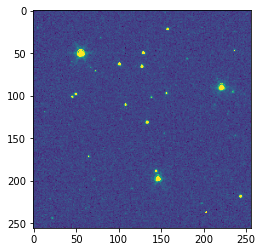

In [16]:
imageprint = plt.imshow(image, vmin = -20, vmax = 80)

In [17]:
#visually finding the brightest star : plt.imshow(image[32:72,35:75], vmin = -20, vmax = 80)
# find the brightest pixel using numpy
x_bright, y_bright = np.where(image == np.max(image))

In [18]:
#x_bright and y_bright are output as arrays, so turn into float64
x_bright = x_bright.astype("int32")
y_bright = y_bright.astype("int32")

In [19]:
cropped_image = image[int(x_bright)-20:int(x_bright)+20, int(y_bright)-20:int(y_bright)+20]

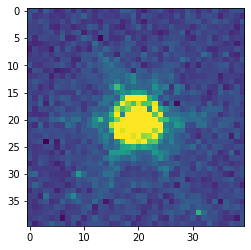

In [20]:
plt.imshow(cropped_image, vmin = -20, vmax = 80)

In [21]:
hdul.data = cropped_image.data
hdul[0].header.update (image_head.to_header())

In [22]:
hdul.writeto('test2.fits', overwrite = True)

In [24]:
#drawing centroid
center = photcent.centroid_sources (image, x_bright, y_bright, box_size = 21)

(array([55.59600389]), array([50.34614598]))